## Read and Parse the logs

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../data/failed_auth.log.csv')
df.index = pd.to_datetime(df['date'])
df.drop(columns=['date','logline'],inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 484 entries, 2017-03-29 10:42:43 to 2017-04-20 13:51:02
Data columns (total 3 columns):
hostname    313 non-null object
user        343 non-null object
ip          484 non-null object
dtypes: object(3)
memory usage: 15.1+ KB


In [4]:
df.head()

,hostname,user,ip
date,,,
2017-03-29 10:42:43,ip-10-77-20-248,elastic_user_7,127.0.0.1
2017-03-29 13:07:13,ip-10-77-20-248,elastic_user_0,85.245.107.41
2017-03-29 13:41:13,ip-10-77-20-248,elastic_user_2,85.245.107.41
2017-03-29 14:15:38,ip-10-77-20-248,NaN,181.25.206.27
2017-03-29 14:15:52,ip-10-77-20-248,NaN,181.25.206.27


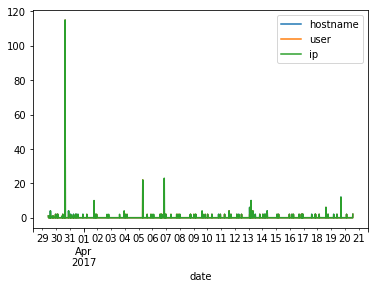

In [5]:
df.resample('10Min').count().plot()

In [6]:
grouped_size = df.groupby([pd.Grouper(freq='10Min'),'user','ip','hostname']).size()
grouped_size.describe()

count     56.000000
mean       4.660714
std       15.577696
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max      115.000000
dtype: float64

In [7]:
pd.DataFrame(grouped_size).head(10)

,,,,0
date,user,ip,hostname,
2017-03-29 10:40:00,elastic_user_7,127.0.0.1,ip-10-77-20-248,1
2017-03-29 13:00:00,elastic_user_0,85.245.107.41,ip-10-77-20-248,1
2017-03-29 13:40:00,elastic_user_2,85.245.107.41,ip-10-77-20-248,1
2017-03-29 17:30:00,elastic_user_6,85.245.107.41,ip-10-77-20-248,1
2017-03-29 19:30:00,elastic_user_4,24.151.103.17,ip-10-77-20-248,1
2017-03-29 23:10:00,root,218.60.136.106,ip-10-77-20-248,2
2017-03-30 02:00:00,root,106.57.58.19,ip-10-77-20-248,2
2017-03-30 03:00:00,root,181.23.168.176,ip-10-77-20-248,2
2017-03-30 10:50:00,elastic_user_3,85.245.107.41,ip-10-77-20-248,1


# Import dsio

In [8]:
from dsio.anomaly_detectors import Gaussian1D, Percentile1D, compute_confusion_matrix
x = grouped_size

### Gaussian1D

In [9]:
detector = Gaussian1D()
detector.fit(x[:10])
detector_output = detector.flag_anomaly(x)
x[list(detector_output)]

date                 user            ip              hostname       
2017-03-30 15:50:00  elastic_user_0  24.151.103.17   ip-10-77-20-248    115
2017-03-30 16:00:00  elastic_user_0  24.151.103.17   ip-10-77-20-248     32
2017-04-11 14:00:00  root            77.231.252.103  ip-10-77-20-248      4
2017-04-13 04:20:00  root            122.163.61.218  ip-10-77-20-248      4
2017-04-13 07:20:00  root            14.54.210.101   ip-10-77-20-248      4
2017-04-18 15:00:00  root            221.194.44.190  ip-10-77-20-248      6
2017-04-19 17:10:00  root            201.178.81.113  ip-10-77-20-248      8
dtype: int64

### Percentile1D

In [10]:
detector = Percentile1D()
detector.fit(x[:10])
detector_output = detector.flag_anomaly(x)
x[list(detector_output)]

date                 user            ip              hostname       
2017-03-30 15:50:00  elastic_user_0  24.151.103.17   ip-10-77-20-248    115
2017-03-30 16:00:00  elastic_user_0  24.151.103.17   ip-10-77-20-248     32
2017-04-11 14:00:00  root            77.231.252.103  ip-10-77-20-248      4
2017-04-13 04:20:00  root            122.163.61.218  ip-10-77-20-248      4
2017-04-13 07:20:00  root            14.54.210.101   ip-10-77-20-248      4
2017-04-18 15:00:00  root            221.194.44.190  ip-10-77-20-248      6
2017-04-19 17:10:00  root            201.178.81.113  ip-10-77-20-248      8
dtype: int64